## Análisis preliminar Despoblación

En este notebook analizamos el comportamiento de algunas de las variables que forman el DataFrame Despoblacion.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
Despob1acion = pd.read_csv('/home/dsc/Python/Despoblacion/Union_Depuracion_Data/Despoblacion_11.csv', 
                           dtype = {'Codigo Provincia' : str, 'Codigo Municipio' : str})

In [4]:
Despob1acion.head() 

,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas
0,Albacete,02,Abengibre,02001,902.0,457.0,445.0,30.77,29.31,634.0,5.0,3.0,19.0,266.0,330.0,193.0,137.0,729.0,316.0,413.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,40.0,28.0,68.0,16.0,28.0,44.0,455.0,462.0,462.0,75.0,545.0,240.0,295.0,485.0,2.0,2.0,60.0,370.0,390.0,250.0,30.0,115.0,30.0,145.0,50.0,35.0,25.0,50.0,795.0,50.0,185.0,205.0,245.0,100.0,75.0,42.0,183.0,461.0,11.0,4.0,100.0,200.0,814.0,500.0,190.0,200.08,3046.46,199.0,8.0
1,Albacete,02,Alatoz,02002,604.0,340.0,264.0,63.86,9.46,858.0,1.0,0.0,5.0,94.0,160.0,98.0,62.0,824.0,376.0,448.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,32.0,27.0,60.0,16.0,20.0,36.0,495.0,528.0,528.0,65.0,320.0,205.0,205.0,305.0,2.0,15.0,55.0,295.0,190.0,210.0,15.0,55.0,25.0,65.0,50.0,35.0,30.0,70.0,505.0,70.0,200.0,95.0,145.0,55.0,25.0,47.0,168.0,558.0,12.0,4.0,60.0,190.0,468.0,350.0,30.0,221.63,3510.26,182.0,19.0
2,Albacete,02,Albacete,02003,171390.0,84288.0,87102.0,1126.99,152.08,681.0,1957.0,658.0,1156.0,69496.0,57712.0,30515.0,27197.0,206017.0,97756.0,108261.0,0.0,0.0,0.0,0.0,21.0,128.0,1099.0,9.0,1.0,7104.0,6570.0,13674.0,8684.0,9293.0,17977.0,15346.0,89834.0,83229.0,29940.0,117445.0,23645.0,79255.0,76720.0,2205.0,4325.0,8525.0,32750.0,108345.0,26480.0,5255.0,6020.0,9455.0,21910.0,8840.0,6490.0,20340.0,13445.0,157585.0,13445.0,33800.0,39760.0,58910.0,16345.0,8765.0,26.0,40004.0,82879.0,7400.0,141.0,37410.0,25570.0,118487.0,101310.0,78378.0,67413.35,112129.80,1406.0,159.0
3,Albacete,02,Albatana,02004,794.0,403.0,391.0,30.50,26.03,582.0,5.0,3.0,5.0,143.0,266.0,204.0,62.0,898.0,336.0,562.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,22.0,19.0,41.0,38.0,40.0,78.0,536.0,570.0,570.0,90.0,470.0,230.0,285.0,415.0,2.0,2.0,60.0,365.0,310.0,235.0,25.0,45.0,2.0,120.0,65.0,35.0,2.0,60.0,700.0,60.0,205.0,140.0,220.0,105.0,55.0,52.0,80.0,454.0,8.0,3.0,35.0,260.0,707.0,489.0,195.0,73.01,2177.74,179.0,23.0
4,Albacete,02,Alborea,02005,848.0,439.0,409.0,71.87,11.80,706.0,7.0,1.0,15.0,161.0,439.0,259.0,180.0,1069.0,537.0,532.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,69.0,69.0,138.0,50.0,66.0,116.0,587.0,636.0,635.0,95.0,510.0,220.0,295.0,430.0,2.0,10.0,85.0,350.0,327.0,215.0,15.0,70.0,35.0,130.0,50.0,35.0,135.0,100.0,705.0,100.0,185.0,140.0,370.0,30.0,2.0,46.0,168.0,680.0,19.0,3.0,115.0,225.0,781.0,454.0,0.0,175.37,3525.71,187.0,6.0


Incluimos la variable objetivo, llamada Umbral, en el DataFrame Despoblacion:
- 0 si es un municipio despoblado (Densidad 2021 <12,5)
- 1 si es un municipio poblado 1(Densidad 2021 >=12,5) 

Para ello necesitamos la densidad de cada municipio en 2021:

In [8]:
Densidad21 = pd.read_csv('/home/dsc/Python/Despoblacion/Data/03_Output_Densidad_Poblacion_21.csv' ,
                         dtype = {'Codigo Provincia' : str, 'Codigo Municipio' : str})

In [9]:
Densidad21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion
0,01001,19.95,146.62
1,01002,96.30,107.03
2,01003,73.02,19.94
3,01004,27.29,66.29
4,01006,12.97,17.81


In [10]:
Densidad21['Umbral'] = Densidad21['Densidad Poblacion'].map(lambda x: 0 if x < 12.5 else 1)

In [11]:
Densidad21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion,Umbral
0,01001,19.95,146.62,1
1,01002,96.30,107.03,1
2,01003,73.02,19.94,1
3,01004,27.29,66.29,1
4,01006,12.97,17.81,1


Merge con la tabla Despoblación para incluir la columna Umbral de 2021:

In [12]:
Despoblacion = Despob1acion.merge(Densidad21, how = 'left', on = 'Codigo Municipio')

In [13]:
Despoblacion.drop(['Superficie Km2_y', 'Densidad Poblacion_y'], axis = 1, inplace = True)
Despoblacion.rename({'Superficie Km2_x' : 'Superficie Km2', 'Densidad Poblacion_x' : 'Densidad Poblacion'},
                   axis = 1, inplace = True)

In [14]:
Despoblacion.head()

,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
0,Albacete,02,Abengibre,02001,902.0,457.0,445.0,30.77,29.31,634.0,5.0,3.0,19.0,266.0,330.0,193.0,137.0,729.0,316.0,413.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,40.0,28.0,68.0,16.0,28.0,44.0,455.0,462.0,462.0,75.0,545.0,240.0,295.0,485.0,2.0,2.0,60.0,370.0,390.0,250.0,30.0,115.0,30.0,145.0,50.0,35.0,25.0,50.0,795.0,50.0,185.0,205.0,245.0,100.0,75.0,42.0,183.0,461.0,11.0,4.0,100.0,200.0,814.0,500.0,190.0,200.08,3046.46,199.0,8.0,1.0
1,Albacete,02,Alatoz,02002,604.0,340.0,264.0,63.86,9.46,858.0,1.0,0.0,5.0,94.0,160.0,98.0,62.0,824.0,376.0,448.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,32.0,27.0,60.0,16.0,20.0,36.0,495.0,528.0,528.0,65.0,320.0,205.0,205.0,305.0,2.0,15.0,55.0,295.0,190.0,210.0,15.0,55.0,25.0,65.0,50.0,35.0,30.0,70.0,505.0,70.0,200.0,95.0,145.0,55.0,25.0,47.0,168.0,558.0,12.0,4.0,60.0,190.0,468.0,350.0,30.0,221.63,3510.26,182.0,19.0,0.0
2,Albacete,02,Albacete,02003,171390.0,84288.0,87102.0,1126.99,152.08,681.0,1957.0,658.0,1156.0,69496.0,57712.0,30515.0,27197.0,206017.0,97756.0,108261.0,0.0,0.0,0.0,0.0,21.0,128.0,1099.0,9.0,1.0,7104.0,6570.0,13674.0,8684.0,9293.0,17977.0,15346.0,89834.0,83229.0,29940.0,117445.0,23645.0,79255.0,76720.0,2205.0,4325.0,8525.0,32750.0,108345.0,26480.0,5255.0,6020.0,9455.0,21910.0,8840.0,6490.0,20340.0,13445.0,157585.0,13445.0,33800.0,39760.0,58910.0,16345.0,8765.0,26.0,40004.0,82879.0,7400.0,141.0,37410.0,25570.0,118487.0,101310.0,78378.0,67413.35,112129.80,1406.0,159.0,1.0
3,Albacete,02,Albatana,02004,794.0,403.0,391.0,30.50,26.03,582.0,5.0,3.0,5.0,143.0,266.0,204.0,62.0,898.0,336.0,562.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,22.0,19.0,41.0,38.0,40.0,78.0,536.0,570.0,570.0,90.0,470.0,230.0,285.0,415.0,2.0,2.0,60.0,365.0,310.0,235.0,25.0,45.0,2.0,120.0,65.0,35.0,2.0,60.0,700.0,60.0,205.0,140.0,220.0,105.0,55.0,52.0,80.0,454.0,8.0,3.0,35.0,260.0,707.0,489.0,195.0,73.01,2177.74,179.0,23.0,1.0
4,Albacete,02,Alborea,02005,848.0,439.0,409.0,71.87,11.80,706.0,7.0,1.0,15.0,161.0,439.0,259.0,180.0,1069.0,537.0,532.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,69.0,69.0,138.0,50.0,66.0,116.0,587.0,636.0,635.0,95.0,510.0,220.0,295.0,430.0,2.0,10.0,85.0,350.0,327.0,215.0,15.0,70.0,35.0,130.0,50.0,35.0,135.0,100.0,705.0,100.0,185.0,140.0,370.0,30.0,2.0,46.0,168.0,680.0,19.0,3.0,115.0,225.0,781.0,454.0,0.0,175.37,3525.71,187.0,6.0,0.0


Guardamos este DataFrame ya que será el que utilizaremos en modelo de ML:

In [15]:
Despoblacion.to_csv('Despoblacion.csv', header = True, index = False)

### Análisis variable objetivo: Umbral

In [16]:
Despoblacion['Umbral'].value_counts()

0.0    3797
1.0    3750
Name: Umbral, dtype: int64

Variable objetivo muy igualadas.

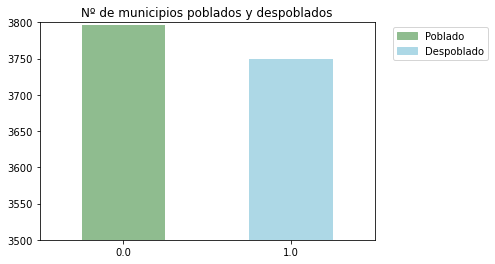

In [21]:
Despoblacion['Umbral'].value_counts().plot(kind="bar",color=['darkseagreen', 'lightblue'])

plt.title('Nº de municipios poblados y despoblados')

plt.xticks(rotation=0)
colors = {'Poblado':'darkseagreen', 'Despoblado':'lightblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.04, 1))
plt.ylim(3500, 3800)
plt.show()

### Análisis descriptivo

In [23]:
Despoblacion.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
count,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7555.00,7547.00
mean,5862.60,2893.42,2969.18,64.31,160.35,628.95,58.50,19.98,47.70,2079.39,1782.13,979.23,802.90,6451.41,3190.92,3260.49,11.69,12.69,16.18,121.57,1.76,4.21,42.55,0.52,0.17,405.17,394.36,799.54,403.73,454.81,858.53,1258.21,3296.14,3156.23,933.59,3871.97,977.55,2518.13,2637.16,83.90,184.95,354.03,1262.31,3562.66,1095.77,171.46,236.06,418.01,736.00,285.85,195.98,804.94,516.48,5249.66,516.48,1343.31,1456.13,1667.43,539.42,260.89,44.30,1244.62,3014.21,256.28,12.13,1244.27,994.91,4188.25,3242.90,3599.33,2355.82,3902.34,162.77,56.57,0.50
std,48770.25,23111.00,25667.05,94.55,826.50,344.14,488.13,184.76,406.58,25149.05,17640.74,8882.06,8797.62,45713.63,22592.23,23170.04,44.93,73.59,130.36,1731.55,3.69,28.08,310.93,3.59,1.70,4280.82,4721.58,8994.34,5049.50,6619.34,11664.63,3330.18,24832.72,23449.96,7065.65,31889.81,9028.92,21987.96,20134.35,787.65,1769.11,3281.44,8231.24,32716.53,9545.26,1211.37,1726.32,3601.16,5892.68,2339.63,1543.92,10153.87,5475.67,42468.60,5475.67,12268.79,11573.19,12343.08,4304.07,2189.76,12.83,9079.86,21710.07,2298.91,62.69,12305.88,7397.27,30475.97,25278.96,76784.38,25945.59,6690.25,286.51,169.93,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,174.00,93.00,81.00,19.24,5.36,353.50,0.00,0.00,2.00,34.00,18.00,12.00,5.00,85.00,45.00,38.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,3.00,3.00,7.00,7.00,6.00,13.00,171.00,181.00,180.00,10.00,95.00,55.00,65.00,80.00,2.00,2.00,15.00,55.00,80.00,55.00,2.00,15.00,5.00,20.00,10.00,2.00,2.00,25.00,140.00,25.00,50.00,40.00,35.00,10.00,2.00,34.00,82.00,178.00,5.00,1.00,15.00,55.00,159.00,90.00,0.00,32.59,883.83,30.00,5.00,0.00
50%,569.00,298.00,274.00,36.10,14.00,693.00,3.00,1.00,7.00,128.00,96.00,58.00,34.00,417.00,218

### Análisis multivariante

Para algunas de las siguientes visualizaciones, necesitamos segmentar el DataFrame en dos, Despoblado y Poblado:

In [24]:
Despoblado = Despoblacion[Despoblacion['Umbral'] == 0]
Poblado = Despoblacion[Despoblacion['Umbral'] == 1]

DataFrame con un rango de valores muy amplio.  
Las variables relacionadas con la población, calculamos % respecto al total de población de cada municipio.  
El resto, escala logarítmica en el eje y.

Població hombre y mujer segmentada por municipios despoblados y poblados:

In [25]:
Despoblado = Despoblado.copy()
Poblado = Poblado.copy()
Poblado['PorcentHombre'] = (Poblado['Poblacion Hombre'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentHombre'] = (Despoblado['Poblacion Hombre'] / Despoblado['Poblacion Total'])*100
Poblado['PorcentMujer'] = (Poblado['Poblacion Mujer'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentMujer'] = (Despoblado['Poblacion Mujer'] / Despoblado['Poblacion Total'])*100

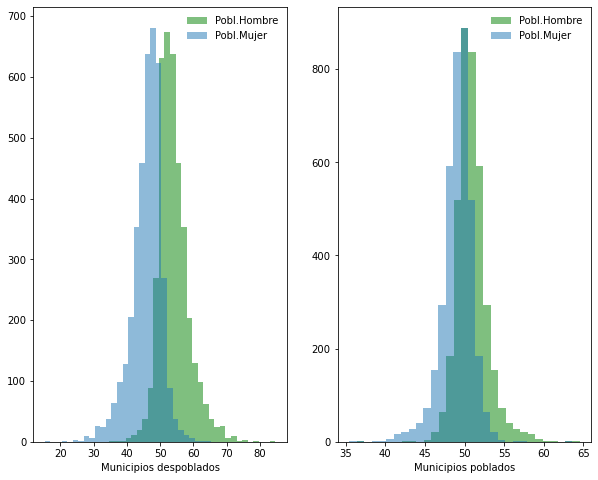

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentHombre'], bins = 30, color='green', alpha = .5, label = 'Pobl.Hombre')
ax1.hist(Despoblado['PorcentMujer'], bins = 30, alpha = .5, label = 'Pobl.Mujer')

ax2.hist(Poblado['PorcentHombre'], bins = 30, color='green', alpha = .5, label = 'Pobl.Hombre')
ax2.hist(Poblado['PorcentMujer'], bins = 30, alpha = .5, label = 'Pobl.Mujer')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Nacimientos y defunciones segmentado por municipios despoblados y poblados:

In [27]:
Poblado['PorcentNacimientos'] = (Poblado['Nacimientos'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentNacimientos'] = (Despoblado['Nacimientos'] / Despoblado['Poblacion Total'])*100
Poblado['PorcentDefunciones'] = (Poblado['Defunciones'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentDefunciones'] = (Despoblado['Defunciones'] / Despoblado['Poblacion Total'])*100

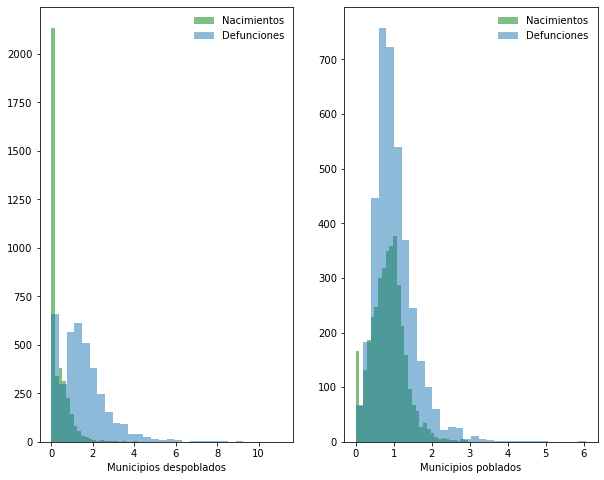

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentNacimientos'], bins = 30, color='green', alpha = .5, label = 'Nacimientos')
ax1.hist(Despoblado['PorcentDefunciones'], bins = 30, alpha = .5, label = 'Defunciones')

ax2.hist(Poblado['PorcentNacimientos'], bins = 30, color='green', alpha = .5, label = 'Nacimientos')
ax2.hist(Poblado['PorcentDefunciones'], bins = 30, alpha = .5, label = 'Defunciones')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Población igual o mayor a 65 años segmentada por municipios despoblados y poblados:

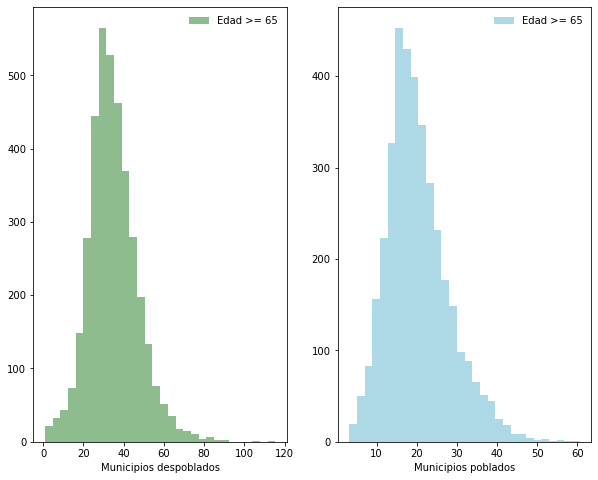

In [29]:
Poblado['Porcent65'] = (Poblado['Edad >= 65'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent65'] = (Despoblado['Edad >= 65'] / Despoblado['Poblacion Total'])*100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Porcent65'], bins = 30, color='darkseagreen', label = 'Edad >= 65')
ax2.hist(Poblado['Porcent65'], bins = 30, color='lightblue', label = 'Edad >= 65')

ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Población con y sin estudios segmentada por municipios despoblados y poblados:

In [30]:
Poblado['PorcentEstudios'] = (Poblado['Con Estudios'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentEstudios'] = (Despoblado['Con Estudios'] / Despoblado['Poblacion Total'])*100
Poblado['PorcentNoEstudios'] = (Poblado['Sin Estudios'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentNoEstudios'] = (Despoblado['Sin Estudios'] / Despoblado['Poblacion Total'])*100

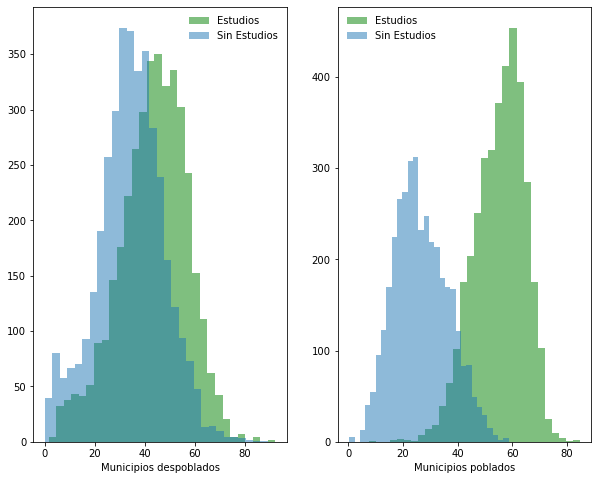

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentEstudios'], bins = 30, color='green', alpha = .5, label = 'Estudios')
ax1.hist(Despoblado['PorcentNoEstudios'], bins = 30, alpha = .5, label = 'Sin Estudios')

ax2.hist(Poblado['PorcentEstudios'], bins = 30, color='green', alpha = .5, label = 'Estudios')
ax2.hist(Poblado['PorcentNoEstudios'], bins = 30, alpha = .5, label = 'Sin Estudios')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

In [33]:
Despoblado[Despoblado['PorcentEstudios']>80]

,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
1146,Burgos,09,Barbadillo del Pez,09039,80.0,52.0,28.0,20.76,3.85,1049.0,0.0,0.0,1.0,14.0,1.0,1.0,0.0,71.0,44.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,8.0,17.0,3.0,0.0,3.0,171.0,171.0,171.0,2.0,2.0,50.0,2.0,2.0,2.0,2.0,25.0,2.0,67.0,55.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,50.0,2.0,65.0,2.0,2.0,2.0,2.0,60.0,127.0,168.0,6.0,0.0,2.0,45.0,98.0,38.0,0.0,35.00,1109.78,8.0,4.0,0.0,65.000000,35.000000,0.000000,1.250000,62.500000,83.750000,2.500000
1464,Burgos,09,Villaquirán de la Puebla,09455,51.0,32.0,19.0,11.48,4.44,813.0,0.0,0.0,1.0,10.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,45.0,47.0,47.0,2.0,30.0,20.0,20.0,25.0,2.0,2.0,2.0,2.0,47.0,15.0,2.0,20.0,2.0,2.0,2.0,2.0,5.0,2.0,50.0,2.0,5.0,30.0,2.0,5.0,5.0,61.0,89.0,44.0,3.0,1.0,2.0,2.0,48.0,31.0,0.0,13.10,1135.81,15.0,3.0,0.0,62.745098,37.254902,0.000000,1.960784,39.215686,92.156863,3.921569
2786,Guadalajara,19,Albendiego,19008,43.0,30.0,13.0,22.91,1.88,1189.0,0.0,0.0,1.0,10.0,7.0,5.0,2.0,36.0,36.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,20.0,76.0,79.0,79.0,5.0,30.0,2.0,25.0,10.0,2.0,2.0,2.0,2.0,37.0,10.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,10.0,25.0,10.0,2.0,20.0,10.0,2.0,2.0,58.0,74.0,77.0,4.0,2.0,2.0,15.0,36.0,19.0,0.0,8.70,1079.33,7.0,2.0,0.0,69.767442,30.232558,0.000000,2.325581,4.651163,86.046512,4.651163
5446,Segovia,40,Cabañas de Polendos,40035,156.0,83.0,73.0,26.41,5.91,939.0,6.0,2.0,0.0,36.0,10.0,7.0,3.0,100.0,52.0,48.0,2.0,1.0,1.0,6.0,2.0,0.0,1.0,0.0,0.0,7.0,6.0,14.0,19.0,17.0,36.0,142.0,158.0,158.0,25.0,130.0,30.0,60.0,100.0,2.0,15.0,10.0,30.0,130.0,45.0,2.0,15.0,20.0,10.0,10.0,5.0,2.0,25.0,155.0,25.0,70.0,50.0,20.0,25.0,2.0,48.0,168.0,178.0,15.0,4.0,50.0,35.0,146.0,116.0,44.0,0.00,2654.69,35.0,10.0,0.0,53.205128,46.794872,3.846154,0.000000,19.230769,83.333333,19.230769
5814,Soria,42,Herrera de Soria,42098,14.0,10.0,4.0,26.07,0.54,1095.0,0.0,0.0,0.0,4.0,6.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,47.0,47.0,47.0,2.0,5.0,2.0,10.0,2.0,2.0,2.0,2.0,2.0,12.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,47.0,58.0,40.0,2.0,0.0,2.0,5.0,11.0,8.0,0.0,3.55,550.42,5.0,1.0,0.0,71.428571,28.571429,0.000000,0.000000,14.285714,85.714286,14.285714
6114,Teruel,44,Anadón,44024,24.0,15.0,9.0,24.62,0.97,1113.0,0.0,0.0,0.0,6.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,60.0,60.0,60.0,2.0,15.0,2.0,2.0,15.0,2.0,2.0,2.0,2.0,22.0,2.0,2.0

Nº de hogares sin internet segmentados por municipios despoblados y poblados:

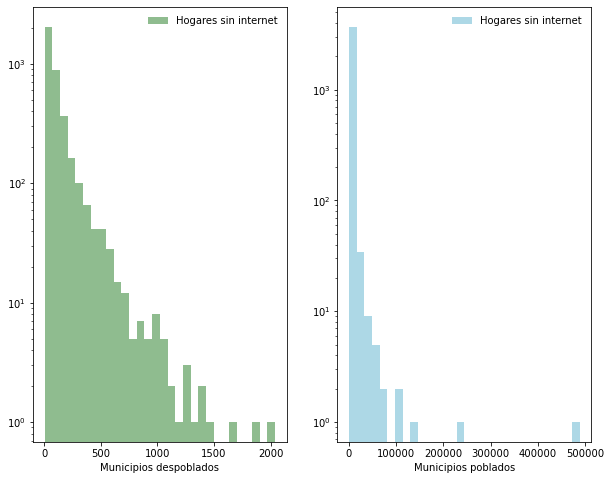

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Nº Hogares no Internet'], bins = 30, color='darkseagreen', label = 'Hogares sin internet')
ax2.hist(Poblado['Nº Hogares no Internet'], bins = 30, color='lightblue', label = 'Hogares sin internet')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Nº de transacciones inmobiliarias anuales segmentadas por municipios despoblados y poblados:

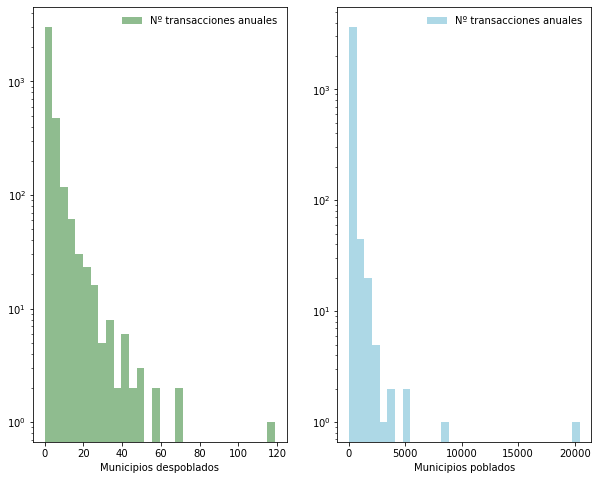

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Número de transacciones anuales 2011'], bins = 30, color='darkseagreen', label = 'Nº transacciones anuales')
ax2.hist(Poblado['Número de transacciones anuales 2011'], bins = 30, color='lightblue', label = 'Nº transacciones anuales')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

In [36]:
Despoblado[Despoblado['Número de transacciones anuales 2011'] >= 45]

,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
597,Badajoz,06,Cabeza del Buey,06023,5365.0,2648.0,2717.0,475.02,11.29,531.0,32.0,10.0,87.0,1319.0,1394.0,979.0,415.0,8088.0,3829.0,4259.0,0.0,0.0,0.0,0.0,2.0,9.0,59.0,1.0,3.0,23.0,45.0,68.0,256.0,252.0,508.0,2835.0,3455.0,3428.0,630.0,3255.0,1315.0,2160.0,2460.0,100.0,90.0,390.0,2120.0,2430.0,1285.0,205.0,350.0,270.0,750.0,285.0,180.0,165.0,425.0,4730.0,425.0,1095.0,1100.0,1840.0,555.0,185.0,44.0,523.0,3189.0,96.0,31.0,830.0,1115.0,3614.0,2869.0,1520.0,1361.08,36927.34,578.0,204.0,0.0,49.356943,50.643057,0.596459,1.621622,24.510718,45.293569,39.515377
1567,Cáceres,10,"Gordo, El",10085,385.0,203.0,182.0,77.04,5.00,320.0,1.0,2.0,4.0,214.0,445.0,270.0,175.0,505.0,213.0,292.0,1.0,2.0,3.0,9.0,1.0,0.0,119.0,0.0,0.0,10.0,13.0,23.0,51.0,48.0,99.0,352.0,359.0,359.0,35.0,245.0,105.0,150.0,205.0,2.0,2.0,25.0,165.0,152.0,110.0,2.0,2.0,25.0,45.0,20.0,20.0,25.0,45.0,325.0,45.0,130.0,120.0,65.0,2.0,20.0,42.0,136.0,363.0,6.0,2.0,50.0,125.0,262.0,168.0,0.0,255.94,4714.31,24.0,9.0,0.0,52.727273,47.272727,0.259740,1.038961,27.272727,39.480519,42.857143
1598,Cáceres,10,Malpartida de Plasencia,10116,4716.0,2379.0,2337.0,372.65,12.66,467.0,56.0,11.0,42.0,1054.0,977.0,581.0,396.0,6719.0,3049.0,3670.0,35.0,31.0,47.0,67.0,1.0,4.0,45.0,2.0,0.0,77.0,75.0,152.0,288.0,227.0,515.0,2170.0,2543.0,2541.0,780.0,3055.0,845.0,1950.0,2320.0,40.0,125.0,240.0,1050.0,2790.0,910.0,190.0,210.0,230.0,560.0,350.0,185.0,60.0,385.0,4200.0,385.0,1175.0,1315.0,1310.0,455.0,35.0,38.0,516.0,2754.0,90.0,5.0,840.0,1000.0,3542.0,2744.0,82.0,964.15,34557.19,340.0,203.0,0.0,50.445293,49.554707,1.187447,0.890585,17.917727,59.160305,22.264631
3187,Huesca,22,Benasque,22054,2236.0,1167.0,1069.0,233.32,9.58,1140.0,16.0,8.0,6.0,1135.0,1224.0,633.0,591.0,1089.0,643.0,446.0,1.0,1.0,16.0,165.0,2.0,6.0,68.0,0.0,0.0,180.0,200.0,380.0,407.0,294.0,701.0,637.0,3408.0,3349.0,295.0,1665.0,210.0,1225.0,785.0,2.0,110.0,45.0,225.0,1585.0,195.0,165.0,80.0,165.0,160.0,55.0,65.0,745.0,205.0,1890.0,205.0,810.0,565.0,425.0,125.0,40.0,25.0,1405.0,3257.0,212.0,4.0,435.0,505.0,1344.0,920.0,3756.0,1822.00,11521.00,58.0,41.0,0.0,52.191413,47.808587,0.715564,0.268336,9.391771,70.885510,10.062612
3272,Huesca,22,Panticosa,22170,820.0,422.0,398.0,95.90,8.55,1186.0,4.0,1.0,7.0,448.0,616.0,289.0,327.0,303.0,186.0,117.0,0.0,2.0,10.0,61.0,1.0,1.0,48.0,0.0,0.0,45.0,34.0,79.0,73.0,73.0,146.0,348.0,1896.0,1894.0,95.0,560.0,125.0,435.0,285.0,2.0,10.0,40.0,145.0,540.0,130.0,55.0,55.0,55.0,75.0,40.0,15.0,185.0,95.0,635

In [37]:
Poblado[Poblado['Número de transacciones anuales 2011'] >= 20000]

,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
4196,Madrid,28,Madrid,28079,3265038.0,1529842.0,1735196.0,605.77,5389.9,657.0,32938.0,12941.0,26544.0,1736667.0,1103251.0,557850.0,545401.0,2636964.0,1312483.0,1324481.0,201.0,4419.0,9450.0,135395.0,187.0,1706.0,20425.0,145.0,102.0,291260.0,338909.0,630169.0,384806.0,511987.0,896793.0,131726.0,1615548.0,1530957.0,458500.0,2112935.0,615165.0,1486500.0,1315145.0,50425.0,114875.0,219655.0,520020.0,2208075.0,637855.0,72960.0,105625.0,234485.0,382030.0,156535.0,104030.0,665045.0,379830.0,2806765.0,379830.0,819840.0,753335.0,794910.0,289370.0,149315.0,36.0,502441.0,1434972.0,140362.0,841.0,832160.0,488370.0,1970814.0,1635666.0,6347900.0,1884054.26,21945.89,127.0,44.0,1.0,46.855259,53.144741,1.008809,0.812977,18.840975,67.62785,15.92692


Grupos de edades segmentadas por municipios despoblados y poblados:

In [38]:
Poblado['Porcent16'] = (Poblado['Edad < 16'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent16'] = (Despoblado['Edad < 16'] / Despoblado['Poblacion Total'])*100
Poblado['Porcent45'] = (Poblado['16 =< Edad =<64'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent45'] = (Despoblado['16 =< Edad =<64'] / Despoblado['Poblacion Total'])*100
Poblado['Porcent65'] = (Poblado['Edad >= 65'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent65'] = (Despoblado['Edad >= 65'] / Despoblado['Poblacion Total'])*100

EdadDespoblado = Despoblado[['Porcent16', 'Porcent45', 'Porcent65']]
EdadPoblado = Poblado[['Porcent16', 'Porcent45', 'Porcent65']]

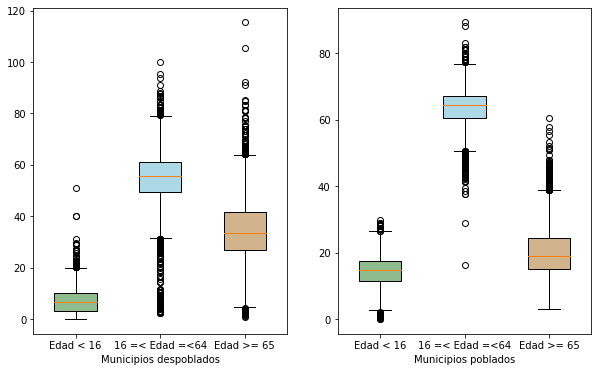

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(EdadDespoblado, patch_artist=True, widths = 0.5, labels = ['Edad < 16', '16 =< Edad =<64', 'Edad >= 65'])
box2 = ax2.boxplot(EdadPoblado, patch_artist=True, widths = 0.5, labels = ['Edad < 16', '16 =< Edad =<64', 'Edad >= 65'])

colors = ['darkseagreen', 'lightblue', 'tan']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

Número de personas extranjeras segmentadas por municipios despoblados y poblados:

In [40]:
Poblado['PorcentHombre'] = (Poblado['Nº Hombres Extranjeros'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentHombre'] = (Despoblado['Nº Hombres Extranjeros'] / Despoblado['Poblacion Total'])*100
Poblado['PorcentMujer'] = (Poblado['Nº Mujeres Extranjeras'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentMujer'] = (Despoblado['Nº Mujeres Extranjeras'] / Despoblado['Poblacion Total'])*100

ExtranDespoblado = Despoblado[['PorcentHombre', 'PorcentMujer']]
ExtranPoblado = Poblado[['PorcentHombre', 'PorcentMujer']]

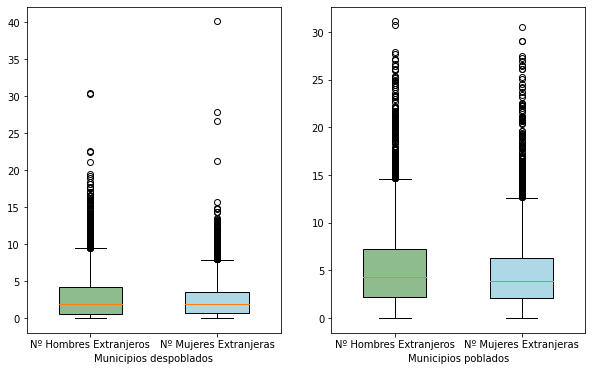

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(ExtranDespoblado, patch_artist=True, widths = 0.5, labels = ['Nº Hombres Extranjeros', 'Nº Mujeres Extranjeras'])
box2 = ax2.boxplot(ExtranPoblado, patch_artist=True, widths = 0.5, labels = ['Nº Hombres Extranjeros', 'Nº Mujeres Extranjeras'])

colors = ['darkseagreen', 'lightblue']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

Número de hogares unipersonales y familiares segmentadas por municipios despoblados y poblados:

In [42]:
HogarDespoblado = Despoblado[['Hogares Unipersonales', 'Hogares Familiares']]
HogarPoblado = Poblado[['Hogares Unipersonales', 'Hogares Familiares']]

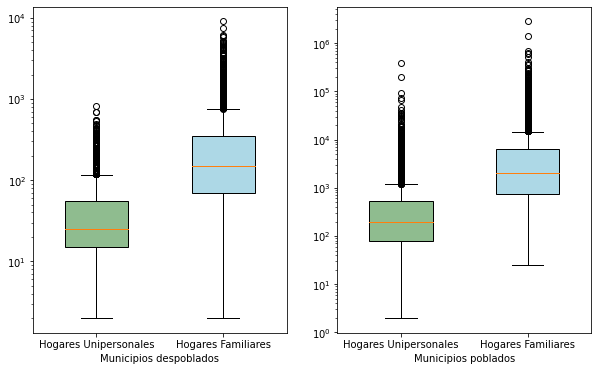

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(HogarDespoblado, patch_artist=True, widths = 0.5, 
                   labels = ['Hogares Unipersonales', 'Hogares Familiares'])
box2 = ax2.boxplot(HogarPoblado, patch_artist=True, widths = 0.5, 
                   labels = ['Hogares Unipersonales', 'Hogares Familiares'])

colors = ['darkseagreen', 'lightblue']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

### Matriz de correlación

Al tener muchas variables, imposible realizar un mapa de calor.  
Optamos por listar las variables con sus correspondientes correlaciones.

In [44]:
Corr = Despoblacion.corr()
ParesCorr = Corr.unstack()
ParesCorr = ParesCorr.sort_values(ascending = False)
print(ParesCorr.to_string())

Poblacion Total                          Poblacion Total                            1.000000
Nº Centros Sanitarios                    Nº Centros Sanitarios                      1.000000
Número de transacciones anuales 2011     Número de transacciones anuales 2011       1.000000
Nº Residencias Mayores                   Nº Residencias Mayores                     1.000000
Nº Instituciones Religiosas y Militares  Nº Instituciones Religiosas y Militares    1.000000
Nº Hombres Extranjeros                   Nº Hombres Extranjeros                     1.000000
Nº Mujeres Extranjeras                   Nº Mujeres Extranjeras                     1.000000
Nº Total Extranjeros                     Nº Total Extranjeros                       1.000000
Nº Hombres Otra CCAA                     Nº Hombres Otra CCAA                       1.000000
Nº Mujeres Otra CCAA                     Nº Mujeres Otra CCAA                       1.000000
Nº Total Otra CCAA                       Nº Total Otra CCAA           

Ponemos el foco en las correlacones de las variables predicitivas respecto a la variable objetivo:

In [45]:
Corr = Despoblacion.corr()
Corr[['Umbral']].sort_values(by = 'Umbral',ascending = False).style.background_gradient()

,Umbral
Umbral,1.000000
Nº edificios,0.285460
Nº Explotaciones Agrícolas,0.282705
Nº Establecimientos Agricultura,0.196259
Densidad Poblacion,0.187924
Nº Establecimientos Industria,0.158610
Nº Explotaciones Ganaderas,0.149973
Otros Usos,0.143688
Sin Estudios,0.137497
Nº Centros Educativos,0.136441
